In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
current_day = "2020-04-01"

In [2]:
covid_data = pd.read_csv("us-statest.csv", parse_dates=True)

#Processing date
covid_data['date'] = pd.to_datetime(covid_data['date'])

# Adding a mortality rate column
covid_data['mortality'] = covid_data.deaths / covid_data.cases


In [3]:
# get the data for each state from the current day
current_data = covid_data[covid_data['date'] == current_day]
# get an numpy array of the top states by cases
top_states = current_data.sort_values('cases', ascending=False)['state'].head(10).values

In [4]:
# ensure Washington as a point of comparison and sort
if ("Washington" in top_states):
    print()
else:
    top_states[9] = "Washington"
targeted_states = sorted(top_states)

# ALL DATA for the top states
cd_top_states = covid_data[covid_data['state'].isin(targeted_states)]

### States by COVID-19 Cases

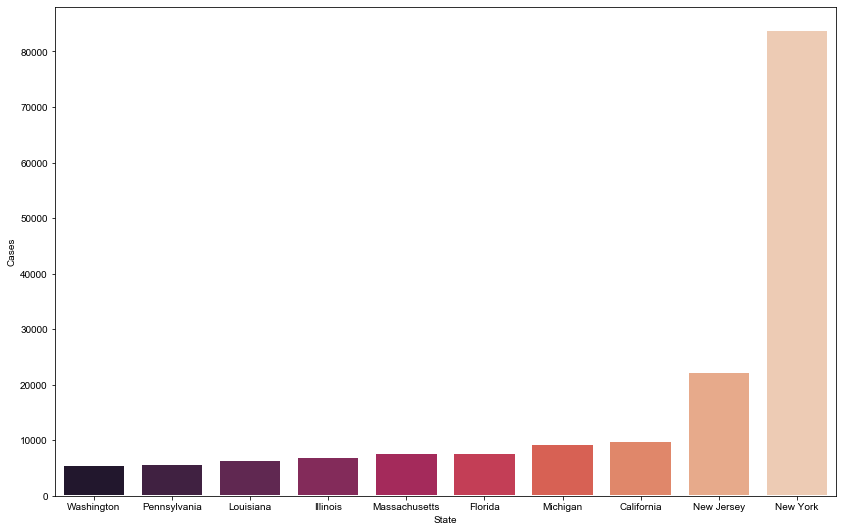

In [5]:
fig, ax = plt.subplots(figsize=(14,9))
sns.set_context('poster',font_scale=0.55)
sns.set_style('whitegrid')
num_cases = []
for state in targeted_states:
    state_data = current_data[current_data['state'] == state]
    num_cases.append(state_data['cases'].values[0])

cases_df = pd.DataFrame(list(zip(targeted_states, num_cases)), columns =['State', 'Cases'])
sns.barplot(x='State', y='Cases', data=cases_df.sort_values('Cases'), palette="rocket")

### Cases vs Deaths in 5 Leading States

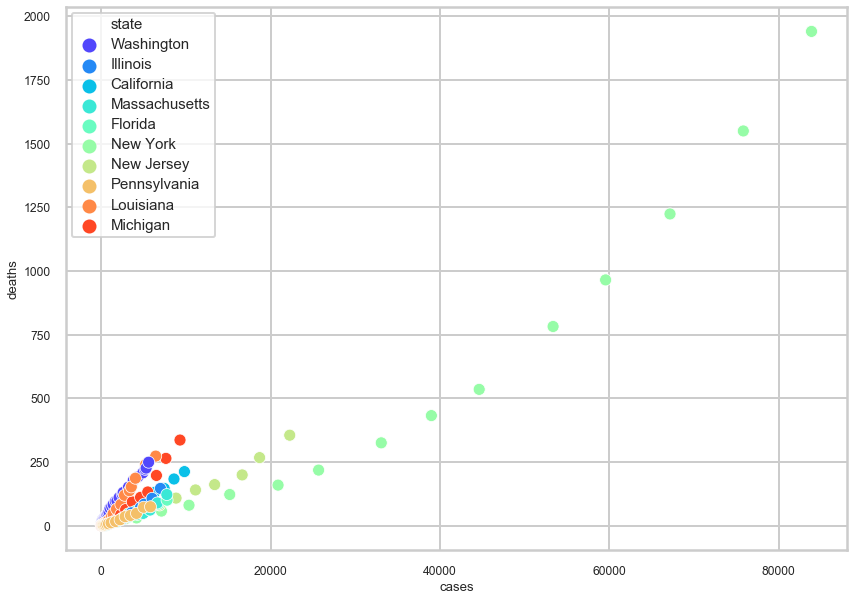

In [6]:
plt.figure(figsize=(14,10))
#sns.set_context('poster',font_scale=1)
sns.set_style('whitegrid')
ax = sns.scatterplot(x='cases', y="deaths", data=cd_top_states, hue="state", palette="rainbow")
plt.setp(ax.get_legend().get_texts(), fontsize='15')
plt.show()

### Current Mortality Ratio in Various States 

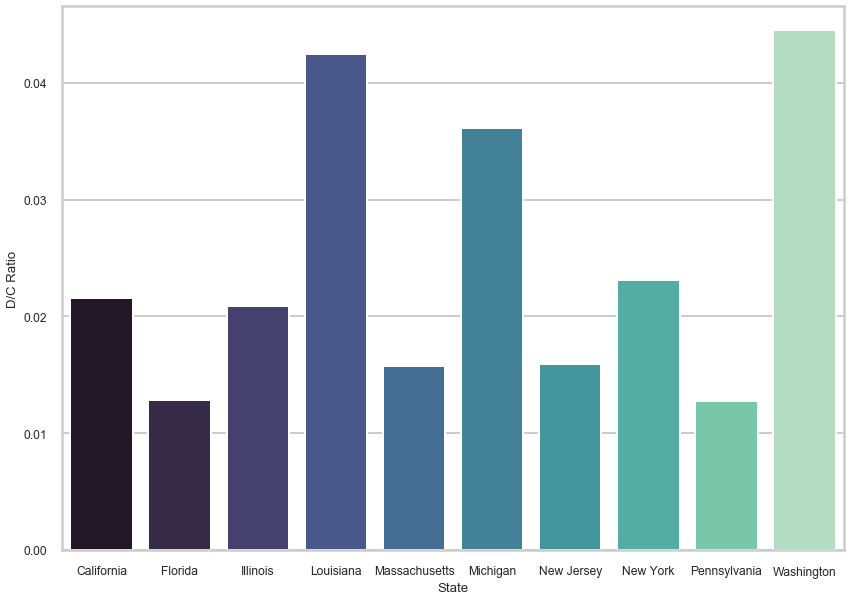

In [7]:
fig, ax = plt.subplots(figsize=(14,10))
#sns.set_context('poster',font_scale=0.5)
sns.set_style('whitegrid')

ratios = [] 
for state in targeted_states:
    state_data = current_data[current_data['state'] == state]
    ratio_value = state_data.deaths / state_data.cases
    ratios.append(ratio_value.values[0])

plt.ylim(0,max(ratios) + 0.002)
idr_df = pd.DataFrame(list(zip(targeted_states, ratios)), columns =['State', 'D/C Ratio'])

sns.barplot(x='State', y='D/C Ratio', data=idr_df, palette="mako")

## Washington Analysis

In [8]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

cd_top_states.set_index('date', inplace=True)
wash_data = cd_top_states[cd_top_states["state"] == "Washington"]
recent_state_data = cd_top_states.loc["2020-02-24":]

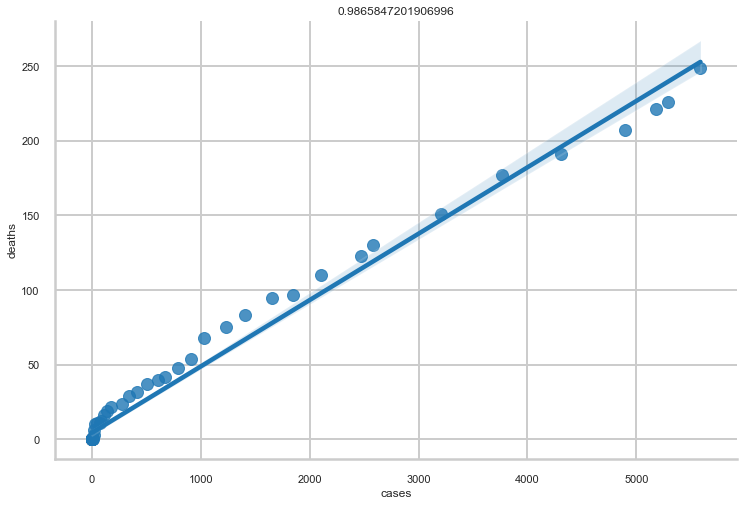

In [46]:
correlation_matrix = np.corrcoef(wash_data.cases, wash_data.deaths)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2


ax = sns.lmplot(x="cases", y="deaths", data=wash_data, height=7, aspect=1.5, palette="mako")
plt.title(r_squared)
plt.show()

### Mortality Rate for Washington State Over Time

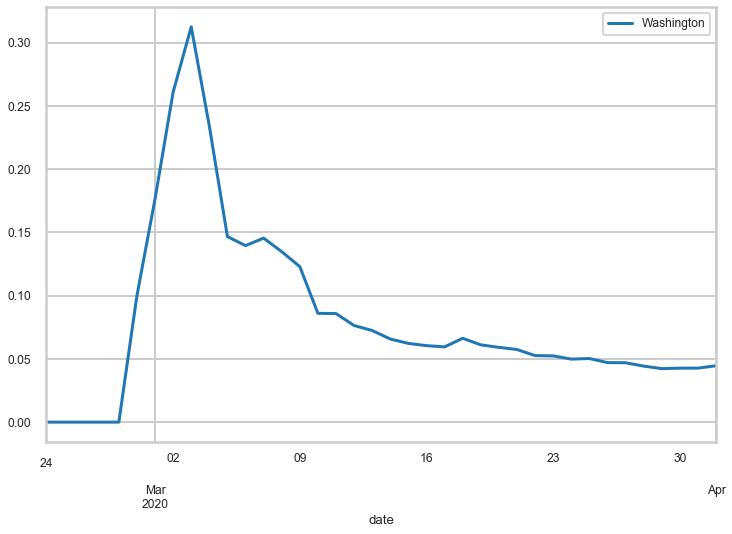

In [10]:
fig, ax = plt.subplots(figsize=(12,8))
sns.set_style('whitegrid')

recent_state_data[recent_state_data['state'] == "Washington"]['mortality'].plot(legend=1.0, label="Washington")

### Washington Confirmed Cases & Deaths Over Time

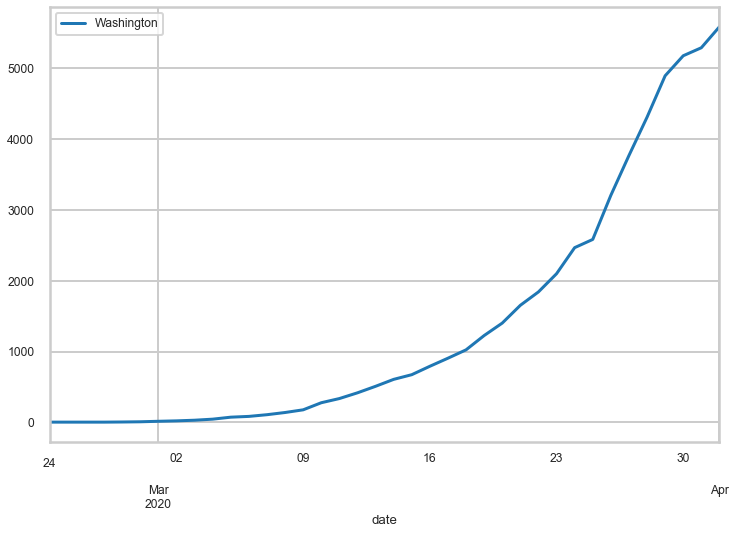

In [11]:
fig, ax = plt.subplots(figsize=(12,8))
sns.set_style('whitegrid')

recent_state_data[recent_state_data['state'] == "Washington"]['cases'].plot(ax=ax, legend=1.0, label="Washington")

### Mortality Rate Over Top States By Cases Over Time

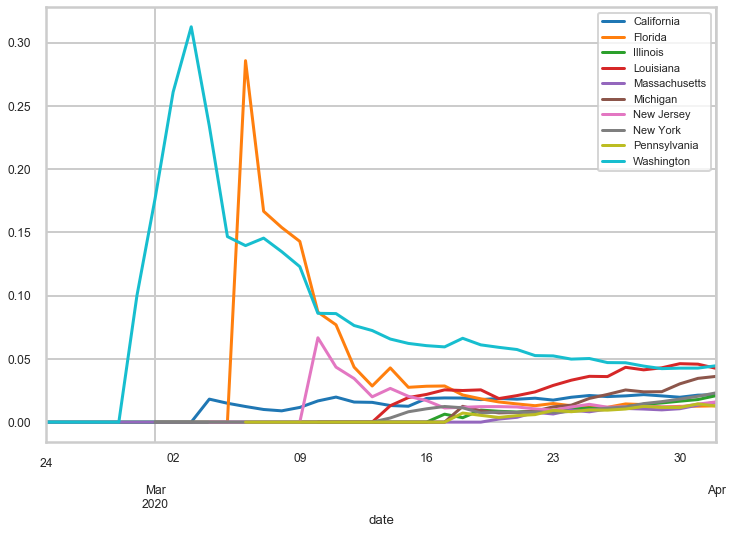

In [12]:
fig, ax = plt.subplots(figsize=(12,8))
sns.set_context('poster',font_scale=0.5)
sns.set_style('whitegrid')

for state in targeted_states:
    state_data = recent_state_data[recent_state_data["state"] == state]
    state_data['mortality'].plot(label=state, legend=1.0)

### COVID-19 Spread by Population Density

In [20]:
pop_density = [['Washington', 107.8], 
               ['California', 251.0], 
               #['New York', 419.3], 
               ['New Jersey', 1207.8], 
               ['Alaska', 1.2], 
               ['Florida', 375.9],
               ['Michigan', 174.7],
               ['Massachusetts', 866.6],
               ['Alabama', 95.5],
               ['Arizona', 60.1],
               ['Arkansas', 57.2],
               ['Colorado', 52.6],
               ['Connecticut', 741.2],
               ['Delaware', 484.1],
               ['Georgia', 176.4],
               ['Hawaii', 222.9],
               ['Idaho', 20.0],
               ['Illinois', 231.4],
               ['Indiana', 184.6],
               ['Iowa', 55.9],
               ['Kansas', 35.6],
               ['Kentucky', 111.4],
               ['Louisiana', 107.2],
               ['Maine', 43.1],
               ['Maryland', 614.5],
               ['Minnesota', 69.0],
               ['Mississippi', 63.8],
               ['Missouri', 88.3],
               ['Montana', 7.1],
               ['Nebraska', 24.7],
               ['Nevada',26.3],
               ['New Hampshire', 148.4],
               ['New Mexico', 17.2],
               ['North Carolina', 206.2],
               ['North Dakota', 11.0],
               ['Ohio', 283.6],
               ['Oklahoma', 57.0],
               ['Oregon', 42.0],
               ['Pennsylvania', 285.7],
               ['Rhode Island', 1010.8],
               ['South Carolina', 162.6],
               ['South Dakota', 11.3],
               ['Tennessee', 160.1],
               ['Texas', 104.9],
               ['Utah', 36.5],
               ['Vermont', 67.7],
               ['Virginia', 211.7],
               ['West Virginia', 76.6],
               ['Wisconsin', 106.3],
               ['Wyoming', 6.0]]
            

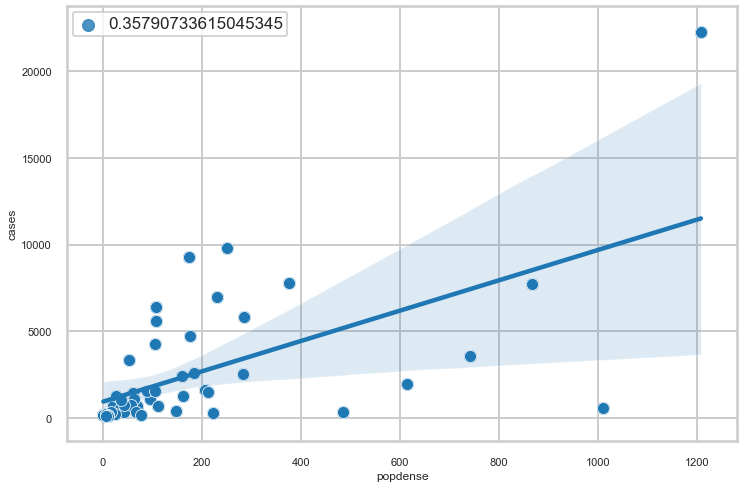

In [41]:
num_cases = []  
for state in pd_data['state']:
     num_cases.append(current_data[current_data.state == state]['cases'].values[0])
pop_dense_df = pd.DataFrame(list(zip(pd_data['popdense'], num_cases)), columns =['popdense', 'cases'])


fig, ax = plt.subplots(figsize=(12,8))
sns.set_style('whitegrid')
pd_data = pd.DataFrame(pop_density, columns = ['state', 'popdense'])


# graph + r^2
correlation_matrix = np.corrcoef(pop_dense_df.popdense, pop_dense_df.cases)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
ax = sns.regplot(x='popdense', y='cases', data=pop_dense_df, label=r_squared)
sns.scatterplot(x='popdense', y='cases', data=pop_dense_df)

# change the font-size of the label
plt.setp(ax.get_legend().get_texts(), fontsize='17')
plt.show()

0.42896620924201045
